<h1 style="font-size:60px;" align="center">  RETINA DAMAGE DETECTION </h1>

Optical Coherence Tomography (OCT) is a non-invasive diagnostic technique that renders an in vivo cross sectional view of the retina. OCT utilizes a concept known as inferometry to create a cross-sectional map of the retina that is accurate to within at least 10-15 microns. OCT was first introduced in 1991 and has found many uses outside of ophthalmology, where it has been used to image certain non-transparent tissues. Due to the transparency of the eye (i.e. the retina can be viewed through the pupil), OCT has gained wide popularity as an ophthalmic diagnostic tool.

OCT is useful in the diagnosis of many retinal conditions, especially when the media is clear. In general, lesions in the macula are easier to image than lesions in the mid and far periphery. OCT can be particularly helpful in diagnosing:
- Macular hole
- Macular pucker
- Vitreomacular traction
- Macular edema
- Detachments of the neurosensory retina and retinal pigment epithelium (e.g. central serous retinopathy or age-related macular degeneration)

In some cases, OCT alone may yield the diagnosis (e.g. macular hole). Yet, in other disorders, especially retinal vascular disorders, it may be helpful to order additional tests (e.g. fluorescein angiogram).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pickle
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

from keras.optimizers import Adam
from keras import applications
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
DATADIR= "F:/kermany2018/OCT2017/OCT2017/train/"

# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()
    
    
CATEGORIES = ['NORMAL','DRUSEN','CNV','DME']

C:\Users\santosh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
final=pickle.load(open("best_model0.pickle","rb"))

In [15]:
test_set = train_datagen.flow_from_directory('F:/kermany2018/OCT2017/OCT2017/test',
  target_size = (150, 150),
  batch_size = 40,
  classes=["DME","CNV","NORMAL","DRUSEN"])
score=final.evaluate_generator(test_set, steps = 10)

Found 968 images belonging to 4 classes.


In [16]:
score

[0.04144187830388546, 0.9850000083446503]

In [17]:
final.save('model.h5')    

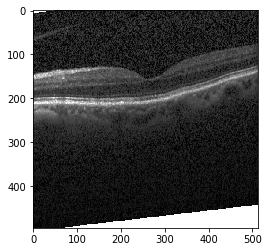

In [4]:

for category in CATEGORIES:
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):# iterate over each image
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            plt.show()  # display!

            break 
    break

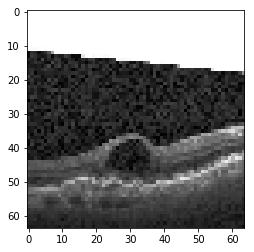

In [33]:
IMG_SIZE = 64
new_array=img_array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


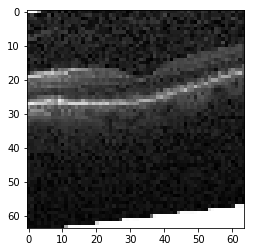

In [4]:
IMG_SIZE = 64
new_array=img_array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [14]:
#DATADIR1= "F:/kermany2018/OCT2017/OCT2017/train/DRUSEN"

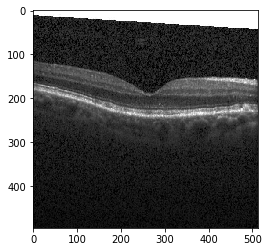

In [15]:
#path= os.path.join(DATADIR1)
for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break 

In [10]:
img_array.shape

(496, 512)

### Training data

In [2]:
training_data = []

IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to files
        class_num = CATEGORIES.index(category)  # get the classification  (0 or 1 or 2 or 3).

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████| 11348/11348 [00:56<00:00, 200.88it/s]


83484


In [3]:
import random
random.shuffle(training_data)

In [4]:
training_data[:2]

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[253, 253, 253],
          [252, 252, 252],
          [251, 251, 251],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[ 16,  16,  16],
          [ 10,  10,  10],
          [  9,   9,   9],
          ...,
          [  7,   7,   7],
          [  5,   5,   5],
          [  4,   4,   4]],
  
         [[ 27,  27,  27],
          [ 11,  11,  11],
          [  6,   6,   6],
          ...,
          [ 11,  11,  11],
          [  5,   5,   5],
          [ 22,  22,  22]],
  
         [[ 20,  20,  20],
          [ 28,  28,  28],
          [ 18,  18,  18

In [5]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
    

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

### CV Data

In [6]:
DATADIR= "F:/kermany2018/OCT2017/OCT2017/val"

CATEGORIES = ['NORMAL','DRUSEN','CNV','DME']

In [9]:
cv_data = []

def create_cv_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 3)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                cv_data.append([new_array, class_num])  # add this to our training_data
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))

create_cv_data()

print(len(cv_data))

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 474.96it/s]


32


In [10]:
X_cv = []
Y_cv = []

for features,label in cv_data:
    X_cv.append(features)
    Y_cv.append(label)
    

X_cv = np.array(X_cv).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

### test data

In [4]:
DATADIR= "F:/kermany2018/OCT2017/OCT2017/test"

CATEGORIES = ['NORMAL','DRUSEN','CNV','DME']

In [5]:
test_data = []

def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 3)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (150,150)) 
                test_data.append([new_array, class_num])  # add this to our training_data
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:02<00:00, 95.87it/s]


968


In [6]:
import random
random.shuffle(test_data)

In [7]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)
    

X_test = np.array(X_test).reshape(-1, 150,150, 3)

### Data Analysis

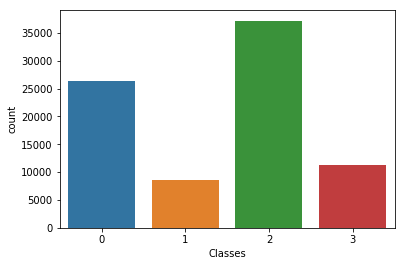

In [23]:
import seaborn as sns
sns.countplot(Y)
plt.xlabel("Classes")
plt.show()

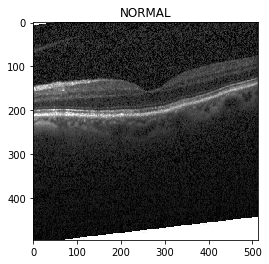

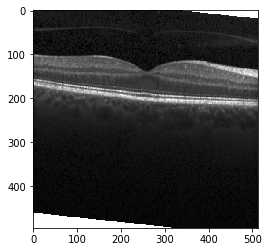

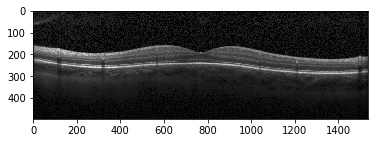

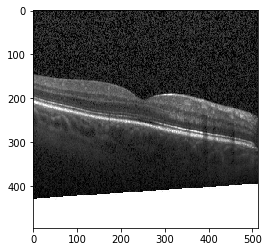

In [41]:
i=1
plt.title("NORMAL")
path= os.path.join(DATADIR,CATEGORIES[0])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

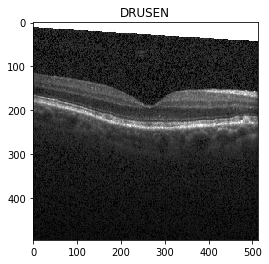

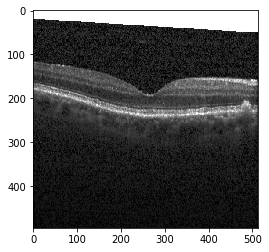

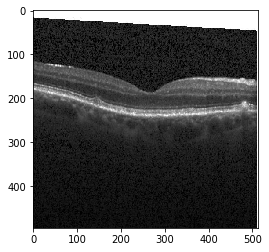

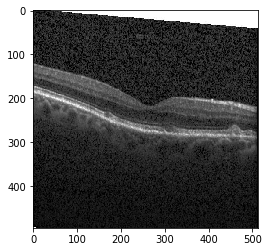

In [43]:
i=1
plt.title(CATEGORIES[1])
path= os.path.join(DATADIR,CATEGORIES[1])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

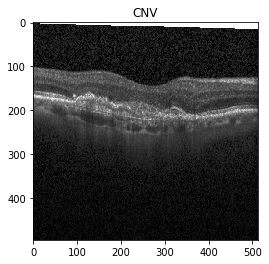

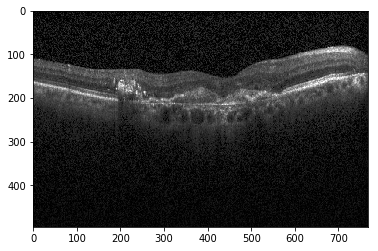

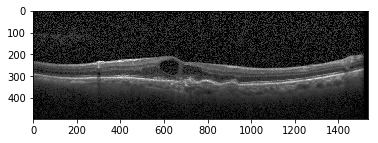

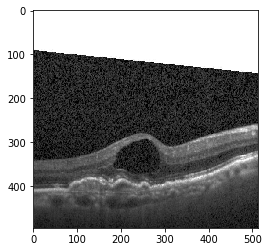

In [23]:
i=1
plt.title(CATEGORIES[2])
path= os.path.join(DATADIR,CATEGORIES[2])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

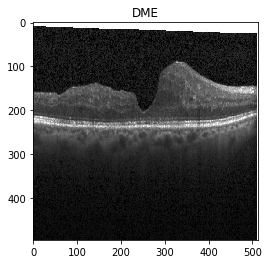

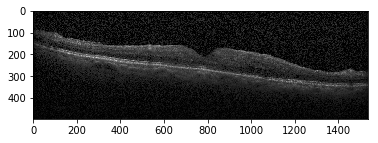

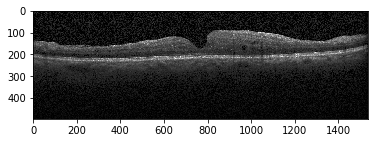

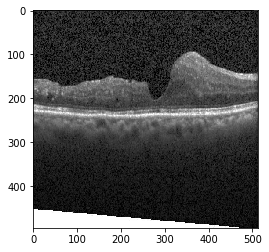

In [45]:
i=1
plt.title(CATEGORIES[3])
path= os.path.join(DATADIR,CATEGORIES[3])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break
        i+=1

In [6]:
print(X.shape)
pin=open("X-64x3","wb")
piny=open("Y-64x3","wb")
pickle.dump(X,pin)
pickle.dump(Y,piny)

(83484, 64, 64, 3)


In [2]:
import pickle
X=pickle.load(open("X1.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

### Preparing data

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

In [7]:
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

In [10]:
X.shape

(83484, 64, 64, 3)

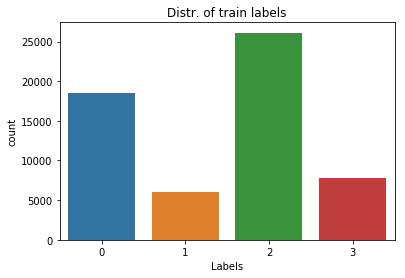

In [9]:
plt.title("Distr. of train labels")
sns.countplot(y_train)
plt.xlabel("Labels")
plt.show()

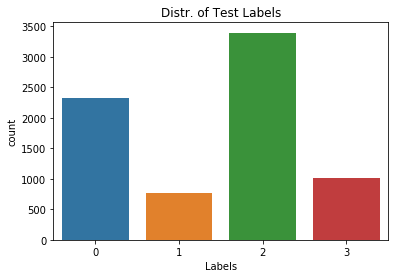

In [27]:
plt.title("Distr. of Test Labels")
sns.countplot(y_test)
plt.xlabel("Labels")
plt.show()

### Data Normalization and declaring useful variables

In [11]:
import keras


In [12]:
num_classes=4

x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (66787, 64, 64, 3)
66787 train samples
16697 test samples


In [12]:
IMG_SIZE = 224
batch_size = 512
num_classes = 4
epochs = 10
input_shape = (IMG_SIZE,IMG_SIZE,1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### model-1 3 x 3 kernel (2-conv -> 1-maxpool)

In [32]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',input_shape=x_train[0].shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile( loss='categorical_crossentropy' , optimizer='adam' , metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 47, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12800)             0         
__________

In [34]:
history= model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=1, validation_split=0.3)

Train on 541 samples, validate on 233 samples
Epoch 1/3
541/541 [==============================] - ETA: 1s - loss: 0.5637 - acc: 0.750 - 38s 70ms/step - loss: 0.5653 - acc: 0.7449 - val_loss: 0.5650 - val_acc: 0.7500
Epoch 2/3
541/541 [==============================] - ETA: 1s - loss: 0.5645 - acc: 0.750 - 37s 69ms/step - loss: 0.5644 - acc: 0.7500 - val_loss: 0.5621 - val_acc: 0.7500
Epoch 3/3
541/541 [==============================] - ETA: 1s - loss: 0.5625 - acc: 0.750 - 39s 71ms/step - loss: 0.5627 - acc: 0.7500 - val_loss: 0.5620 - val_acc: 0.7500


In [32]:
import pickle
pickle_out = open("dlp-Model-cnn-128x3.pickle","wb")
out = pickle.dump(model,pickle_out)

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)

Test score: 0.5626770147343272
Test accuracy: 0.75


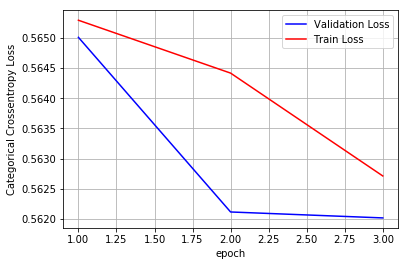

In [37]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,3+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

Test score: 1.1205604013760884
Test accuracy: 0.5150666666666667


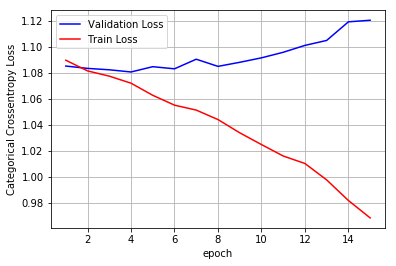

In [30]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,15+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

### 7 Layer

In [16]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',input_shape=x_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile( loss='binary_crossentropy' , optimizer='adam' , metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 47, 47, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         147584    
__________

In [17]:
history= model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=1, validation_split=0.3)

Train on 541 samples, validate on 233 samples
Epoch 1/3
541/541 [==============================] - ETA: 26s - loss: 0.5624 - acc: 0.75 - ETA: 22s - loss: 0.5663 - acc: 0.75 - ETA: 19s - loss: 0.5654 - acc: 0.75 - ETA: 17s - loss: 0.5646 - acc: 0.75 - ETA: 16s - loss: 0.5640 - acc: 0.75 - ETA: 15s - loss: 0.5643 - acc: 0.75 - ETA: 13s - loss: 0.5641 - acc: 0.75 - ETA: 12s - loss: 0.5637 - acc: 0.75 - ETA: 11s - loss: 0.5634 - acc: 0.75 - ETA: 9s - loss: 0.5640 - acc: 0.7500 - ETA: 8s - loss: 0.5636 - acc: 0.750 - ETA: 6s - loss: 0.5635 - acc: 0.750 - ETA: 5s - loss: 0.5634 - acc: 0.750 - ETA: 4s - loss: 0.5631 - acc: 0.750 - ETA: 2s - loss: 0.5634 - acc: 0.750 - ETA: 1s - loss: 0.5633 - acc: 0.750 - 27s 50ms/step - loss: 0.5633 - acc: 0.7500 - val_loss: 0.5638 - val_acc: 0.7500
Epoch 2/3
541/541 [==============================] - ETA: 22s - loss: 0.5632 - acc: 0.75 - ETA: 20s - loss: 0.5611 - acc: 0.75 - ETA: 19s - loss: 0.5617 - acc: 0.75 - ETA: 18s - loss: 0.5618 - acc: 0.75 - ETA: 16

In [11]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (4, 4)))
classifier.add(Conv2D(512, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 512)       147968    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          147488    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [12]:
classifier.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale = 1./255
  )
training_set = train_datagen.flow_from_directory('F:/kermany2018/OCT2017/OCT2017/train',
  target_size = (150, 150),
  batch_size = 40,
  classes=["DME","CNV","NORMAL","DRUSEN"])

validation_set = train_datagen.flow_from_directory('F:/kermany2018/OCT2017/OCT2017/val',
  target_size = (150, 150),
  batch_size = 40,
  classes=["DME","CNV","NORMAL","DRUSEN"])

test_set = train_datagen.flow_from_directory('F:/kermany2018/OCT2017/OCT2017/test',
  target_size = (150, 150),
  batch_size = 40,
  classes=["DME","CNV","NORMAL","DRUSEN"])

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [ ]:
history=classifier.fit_generator(training_set,
  steps_per_epoch = 83484/40,
  epochs = 30)

Epoch 1/30


 204/2087 [=>............................] - ETA: 1:22:14 - loss: 1.3958 - acc: 0.10 - ETA: 1:06:21 - loss: 1.3915 - acc: 0.20 - ETA: 1:00:01 - loss: 1.3883 - acc: 0.23 - ETA: 57:06 - loss: 1.3861 - acc: 0.2438 - ETA: 56:01 - loss: 1.3847 - acc: 0.24 - ETA: 54:48 - loss: 1.3830 - acc: 0.26 - ETA: 54:03 - loss: 1.3809 - acc: 0.28 - ETA: 53:22 - loss: 1.3786 - acc: 0.30 - ETA: 52:42 - loss: 1.3775 - acc: 0.29 - ETA: 52:37 - loss: 1.3767 - acc: 0.29 - ETA: 52:18 - loss: 1.3761 - acc: 0.29 - ETA: 52:10 - loss: 1.3750 - acc: 0.30 - ETA: 51:48 - loss: 1.3750 - acc: 0.30 - ETA: 51:38 - loss: 1.3744 - acc: 0.30 - ETA: 51:20 - loss: 1.3742 - acc: 0.30 - ETA: 51:19 - loss: 1.3729 - acc: 0.30 - ETA: 51:07 - loss: 1.3726 - acc: 0.29 - ETA: 50:59 - loss: 1.3715 - acc: 0.30 - ETA: 50:49 - loss: 1.3704 - acc: 0.31 - ETA: 50:37 - loss: 1.3699 - acc: 0.30 - ETA: 50:36 - loss: 1.3692 - acc: 0.32 - ETA: 50:39 - loss: 1.3677 - acc: 0.32 - ETA: 50:33 - loss: 1.3672 - acc: 0.32 - ETA: 50:28 - loss: 1.3661 -

 612/2087 [=======>......................] - ETA: 38:57 - loss: 1.2504 - acc: 0.43 - ETA: 38:56 - loss: 1.2506 - acc: 0.43 - ETA: 38:54 - loss: 1.2503 - acc: 0.43 - ETA: 38:52 - loss: 1.2503 - acc: 0.43 - ETA: 38:51 - loss: 1.2501 - acc: 0.43 - ETA: 38:49 - loss: 1.2500 - acc: 0.43 - ETA: 38:47 - loss: 1.2501 - acc: 0.43 - ETA: 38:46 - loss: 1.2501 - acc: 0.43 - ETA: 38:44 - loss: 1.2500 - acc: 0.43 - ETA: 38:43 - loss: 1.2496 - acc: 0.43 - ETA: 38:41 - loss: 1.2494 - acc: 0.43 - ETA: 38:39 - loss: 1.2491 - acc: 0.43 - ETA: 38:38 - loss: 1.2489 - acc: 0.43 - ETA: 38:36 - loss: 1.2491 - acc: 0.43 - ETA: 38:35 - loss: 1.2488 - acc: 0.43 - ETA: 38:33 - loss: 1.2489 - acc: 0.43 - ETA: 38:32 - loss: 1.2485 - acc: 0.43 - ETA: 38:31 - loss: 1.2480 - acc: 0.43 - ETA: 38:29 - loss: 1.2474 - acc: 0.43 - ETA: 38:27 - loss: 1.2478 - acc: 0.43 - ETA: 38:26 - loss: 1.2479 - acc: 0.43 - ETA: 38:25 - loss: 1.2476 - acc: 0.43 - ETA: 38:23 - loss: 1.2475 - acc: 0.43 - ETA: 38:22 - loss: 1.2470 - acc: 0.

 816/2087 [==========>...................] - ETA: 33:53 - loss: 1.2468 - acc: 0.43 - ETA: 33:51 - loss: 1.2467 - acc: 0.43 - ETA: 33:50 - loss: 1.2466 - acc: 0.43 - ETA: 33:48 - loss: 1.2465 - acc: 0.43 - ETA: 33:47 - loss: 1.2463 - acc: 0.43 - ETA: 33:45 - loss: 1.2463 - acc: 0.43 - ETA: 33:44 - loss: 1.2463 - acc: 0.43 - ETA: 33:42 - loss: 1.2461 - acc: 0.43 - ETA: 33:41 - loss: 1.2461 - acc: 0.43 - ETA: 33:39 - loss: 1.2461 - acc: 0.43 - ETA: 33:38 - loss: 1.2463 - acc: 0.43 - ETA: 33:36 - loss: 1.2463 - acc: 0.43 - ETA: 33:35 - loss: 1.2464 - acc: 0.43 - ETA: 33:33 - loss: 1.2461 - acc: 0.43 - ETA: 33:32 - loss: 1.2458 - acc: 0.43 - ETA: 33:30 - loss: 1.2458 - acc: 0.43 - ETA: 33:29 - loss: 1.2458 - acc: 0.43 - ETA: 33:27 - loss: 1.2459 - acc: 0.43 - ETA: 33:26 - loss: 1.2457 - acc: 0.43 - ETA: 33:24 - loss: 1.2456 - acc: 0.43 - ETA: 33:23 - loss: 1.2455 - acc: 0.43 - ETA: 33:22 - loss: 1.2457 - acc: 0.43 - ETA: 33:20 - loss: 1.2456 - acc: 0.43 - ETA: 33:19 - loss: 1.2456 - acc: 0.

1020/2087 [=============>................] - ETA: 28:59 - loss: 1.2372 - acc: 0.43 - ETA: 28:58 - loss: 1.2371 - acc: 0.43 - ETA: 28:56 - loss: 1.2371 - acc: 0.43 - ETA: 28:55 - loss: 1.2371 - acc: 0.43 - ETA: 28:54 - loss: 1.2369 - acc: 0.43 - ETA: 28:52 - loss: 1.2369 - acc: 0.43 - ETA: 28:51 - loss: 1.2369 - acc: 0.43 - ETA: 28:49 - loss: 1.2370 - acc: 0.43 - ETA: 28:48 - loss: 1.2369 - acc: 0.43 - ETA: 28:46 - loss: 1.2369 - acc: 0.43 - ETA: 28:45 - loss: 1.2370 - acc: 0.43 - ETA: 28:44 - loss: 1.2370 - acc: 0.43 - ETA: 28:42 - loss: 1.2369 - acc: 0.43 - ETA: 28:41 - loss: 1.2367 - acc: 0.43 - ETA: 28:39 - loss: 1.2368 - acc: 0.43 - ETA: 28:38 - loss: 1.2367 - acc: 0.43 - ETA: 28:37 - loss: 1.2367 - acc: 0.43 - ETA: 28:35 - loss: 1.2366 - acc: 0.43 - ETA: 28:34 - loss: 1.2365 - acc: 0.43 - ETA: 28:32 - loss: 1.2365 - acc: 0.43 - ETA: 28:31 - loss: 1.2366 - acc: 0.43 - ETA: 28:29 - loss: 1.2364 - acc: 0.43 - ETA: 28:28 - loss: 1.2365 - acc: 0.43 - ETA: 28:27 - loss: 1.2366 - acc: 0.

1224/2087 [================>.............] - ETA: 24:15 - loss: 1.2278 - acc: 0.44 - ETA: 24:14 - loss: 1.2277 - acc: 0.44 - ETA: 24:12 - loss: 1.2279 - acc: 0.44 - ETA: 24:11 - loss: 1.2278 - acc: 0.44 - ETA: 24:09 - loss: 1.2278 - acc: 0.44 - ETA: 24:08 - loss: 1.2278 - acc: 0.44 - ETA: 24:07 - loss: 1.2277 - acc: 0.44 - ETA: 24:05 - loss: 1.2275 - acc: 0.44 - ETA: 24:04 - loss: 1.2275 - acc: 0.44 - ETA: 24:03 - loss: 1.2275 - acc: 0.44 - ETA: 24:01 - loss: 1.2273 - acc: 0.44 - ETA: 24:00 - loss: 1.2272 - acc: 0.44 - ETA: 23:58 - loss: 1.2273 - acc: 0.44 - ETA: 23:57 - loss: 1.2273 - acc: 0.44 - ETA: 23:56 - loss: 1.2273 - acc: 0.44 - ETA: 23:54 - loss: 1.2274 - acc: 0.44 - ETA: 23:53 - loss: 1.2273 - acc: 0.44 - ETA: 23:51 - loss: 1.2271 - acc: 0.44 - ETA: 23:50 - loss: 1.2271 - acc: 0.44 - ETA: 23:49 - loss: 1.2269 - acc: 0.44 - ETA: 23:47 - loss: 1.2268 - acc: 0.44 - ETA: 23:46 - loss: 1.2268 - acc: 0.44 - ETA: 23:44 - loss: 1.2267 - acc: 0.44 - ETA: 23:43 - loss: 1.2266 - acc: 0.

1428/2087 [===================>..........] - ETA: 19:42 - loss: 1.2151 - acc: 0.45 - ETA: 19:41 - loss: 1.2150 - acc: 0.45 - ETA: 19:39 - loss: 1.2151 - acc: 0.45 - ETA: 19:38 - loss: 1.2152 - acc: 0.45 - ETA: 19:37 - loss: 1.2151 - acc: 0.45 - ETA: 19:35 - loss: 1.2151 - acc: 0.45 - ETA: 19:34 - loss: 1.2150 - acc: 0.45 - ETA: 19:32 - loss: 1.2150 - acc: 0.45 - ETA: 19:31 - loss: 1.2149 - acc: 0.46 - ETA: 19:30 - loss: 1.2146 - acc: 0.46 - ETA: 19:28 - loss: 1.2147 - acc: 0.46 - ETA: 19:27 - loss: 1.2146 - acc: 0.46 - ETA: 19:26 - loss: 1.2143 - acc: 0.46 - ETA: 19:24 - loss: 1.2142 - acc: 0.46 - ETA: 19:23 - loss: 1.2142 - acc: 0.46 - ETA: 19:21 - loss: 1.2141 - acc: 0.46 - ETA: 19:20 - loss: 1.2140 - acc: 0.46 - ETA: 19:19 - loss: 1.2139 - acc: 0.46 - ETA: 19:17 - loss: 1.2139 - acc: 0.46 - ETA: 19:16 - loss: 1.2138 - acc: 0.46 - ETA: 19:14 - loss: 1.2139 - acc: 0.46 - ETA: 19:13 - loss: 1.2138 - acc: 0.46 - ETA: 19:12 - loss: 1.2137 - acc: 0.46 - ETA: 19:10 - loss: 1.2136 - acc: 0.

1632/2087 [======================>.......] - ETA: 15:03 - loss: 1.1997 - acc: 0.47 - ETA: 15:02 - loss: 1.1996 - acc: 0.47 - ETA: 15:00 - loss: 1.1995 - acc: 0.47 - ETA: 14:59 - loss: 1.1994 - acc: 0.47 - ETA: 14:58 - loss: 1.1993 - acc: 0.47 - ETA: 14:56 - loss: 1.1992 - acc: 0.47 - ETA: 14:55 - loss: 1.1990 - acc: 0.47 - ETA: 14:53 - loss: 1.1991 - acc: 0.47 - ETA: 14:52 - loss: 1.1989 - acc: 0.47 - ETA: 14:51 - loss: 1.1988 - acc: 0.47 - ETA: 14:49 - loss: 1.1987 - acc: 0.47 - ETA: 14:48 - loss: 1.1986 - acc: 0.47 - ETA: 14:46 - loss: 1.1985 - acc: 0.47 - ETA: 14:45 - loss: 1.1985 - acc: 0.47 - ETA: 14:44 - loss: 1.1986 - acc: 0.47 - ETA: 14:42 - loss: 1.1984 - acc: 0.47 - ETA: 14:41 - loss: 1.1983 - acc: 0.47 - ETA: 14:39 - loss: 1.1981 - acc: 0.47 - ETA: 14:38 - loss: 1.1980 - acc: 0.47 - ETA: 14:37 - loss: 1.1979 - acc: 0.47 - ETA: 14:35 - loss: 1.1976 - acc: 0.47 - ETA: 14:34 - loss: 1.1974 - acc: 0.47 - ETA: 14:33 - loss: 1.1974 - acc: 0.47 - ETA: 14:31 - loss: 1.1972 - acc: 0.

1836/2087 [=========================>....] - ETA: 10:23 - loss: 1.1777 - acc: 0.49 - ETA: 10:22 - loss: 1.1779 - acc: 0.49 - ETA: 10:20 - loss: 1.1779 - acc: 0.49 - ETA: 10:19 - loss: 1.1778 - acc: 0.49 - ETA: 10:18 - loss: 1.1778 - acc: 0.49 - ETA: 10:16 - loss: 1.1776 - acc: 0.49 - ETA: 10:15 - loss: 1.1774 - acc: 0.49 - ETA: 10:14 - loss: 1.1774 - acc: 0.49 - ETA: 10:12 - loss: 1.1773 - acc: 0.49 - ETA: 10:11 - loss: 1.1772 - acc: 0.49 - ETA: 10:10 - loss: 1.1774 - acc: 0.49 - ETA: 10:08 - loss: 1.1776 - acc: 0.49 - ETA: 10:07 - loss: 1.1775 - acc: 0.49 - ETA: 10:06 - loss: 1.1773 - acc: 0.49 - ETA: 10:04 - loss: 1.1771 - acc: 0.49 - ETA: 10:03 - loss: 1.1769 - acc: 0.49 - ETA: 10:02 - loss: 1.1767 - acc: 0.49 - ETA: 10:00 - loss: 1.1768 - acc: 0.49 - ETA: 9:59 - loss: 1.1767 - acc: 0.4928 - ETA: 9:58 - loss: 1.1764 - acc: 0.492 - ETA: 9:57 - loss: 1.1763 - acc: 0.493 - ETA: 9:55 - loss: 1.1761 - acc: 0.493 - ETA: 9:54 - loss: 1.1759 - acc: 0.493 - ETA: 9:53 - loss: 1.1759 - acc: 0.

2040/2087 [============================>.] - ETA: 5:46 - loss: 1.1566 - acc: 0.506 - ETA: 5:45 - loss: 1.1565 - acc: 0.506 - ETA: 5:44 - loss: 1.1563 - acc: 0.506 - ETA: 5:42 - loss: 1.1562 - acc: 0.506 - ETA: 5:41 - loss: 1.1562 - acc: 0.506 - ETA: 5:40 - loss: 1.1561 - acc: 0.506 - ETA: 5:38 - loss: 1.1559 - acc: 0.506 - ETA: 5:37 - loss: 1.1558 - acc: 0.506 - ETA: 5:35 - loss: 1.1557 - acc: 0.506 - ETA: 5:34 - loss: 1.1556 - acc: 0.506 - ETA: 5:33 - loss: 1.1554 - acc: 0.506 - ETA: 5:31 - loss: 1.1552 - acc: 0.506 - ETA: 5:30 - loss: 1.1551 - acc: 0.506 - ETA: 5:29 - loss: 1.1550 - acc: 0.507 - ETA: 5:27 - loss: 1.1549 - acc: 0.507 - ETA: 5:26 - loss: 1.1547 - acc: 0.507 - ETA: 5:24 - loss: 1.1547 - acc: 0.507 - ETA: 5:23 - loss: 1.1547 - acc: 0.507 - ETA: 5:22 - loss: 1.1546 - acc: 0.507 - ETA: 5:20 - loss: 1.1545 - acc: 0.507 - ETA: 5:19 - loss: 1.1545 - acc: 0.507 - ETA: 5:18 - loss: 1.1544 - acc: 0.507 - ETA: 5:16 - loss: 1.1544 - acc: 0.507 - ETA: 5:15 - loss: 1.1541 - acc: 0.5

2088/2087 [==============================] - ETA: 1:04 - loss: 1.1339 - acc: 0.519 - ETA: 1:02 - loss: 1.1338 - acc: 0.519 - ETA: 1:01 - loss: 1.1337 - acc: 0.519 - ETA: 59s - loss: 1.1336 - acc: 0.520 - ETA: 58s - loss: 1.1335 - acc: 0.52 - ETA: 57s - loss: 1.1334 - acc: 0.52 - ETA: 55s - loss: 1.1332 - acc: 0.52 - ETA: 54s - loss: 1.1331 - acc: 0.52 - ETA: 52s - loss: 1.1329 - acc: 0.52 - ETA: 51s - loss: 1.1329 - acc: 0.52 - ETA: 50s - loss: 1.1327 - acc: 0.52 - ETA: 48s - loss: 1.1326 - acc: 0.52 - ETA: 47s - loss: 1.1325 - acc: 0.52 - ETA: 45s - loss: 1.1323 - acc: 0.52 - ETA: 44s - loss: 1.1324 - acc: 0.52 - ETA: 43s - loss: 1.1322 - acc: 0.52 - ETA: 41s - loss: 1.1321 - acc: 0.52 - ETA: 40s - loss: 1.1319 - acc: 0.52 - ETA: 39s - loss: 1.1319 - acc: 0.52 - ETA: 37s - loss: 1.1318 - acc: 0.52 - ETA: 36s - loss: 1.1315 - acc: 0.52 - ETA: 34s - loss: 1.1313 - acc: 0.52 - ETA: 33s - loss: 1.1312 - acc: 0.52 - ETA: 32s - loss: 1.1311 - acc: 0.52 - ETA: 30s - loss: 1.1311 - acc: 0.52 

 204/2087 [=>............................] - ETA: 51:10 - loss: 1.3392 - acc: 0.52 - ETA: 48:56 - loss: 1.2475 - acc: 0.53 - ETA: 48:50 - loss: 1.2029 - acc: 0.55 - ETA: 48:43 - loss: 1.1510 - acc: 0.56 - ETA: 48:40 - loss: 1.1165 - acc: 0.57 - ETA: 48:42 - loss: 1.0819 - acc: 0.58 - ETA: 48:34 - loss: 1.0752 - acc: 0.58 - ETA: 48:17 - loss: 1.0563 - acc: 0.58 - ETA: 48:10 - loss: 1.0261 - acc: 0.60 - ETA: 48:14 - loss: 1.0204 - acc: 0.60 - ETA: 48:07 - loss: 0.9989 - acc: 0.61 - ETA: 48:11 - loss: 0.9895 - acc: 0.61 - ETA: 48:08 - loss: 0.9723 - acc: 0.62 - ETA: 48:02 - loss: 0.9603 - acc: 0.63 - ETA: 48:03 - loss: 0.9580 - acc: 0.63 - ETA: 47:58 - loss: 0.9503 - acc: 0.63 - ETA: 47:58 - loss: 0.9498 - acc: 0.64 - ETA: 47:54 - loss: 0.9441 - acc: 0.64 - ETA: 47:55 - loss: 0.9387 - acc: 0.64 - ETA: 47:51 - loss: 0.9305 - acc: 0.64 - ETA: 47:50 - loss: 0.9186 - acc: 0.65 - ETA: 47:45 - loss: 0.9185 - acc: 0.65 - ETA: 47:40 - loss: 0.9167 - acc: 0.65 - ETA: 47:39 - loss: 0.9315 - acc: 0.

 612/2087 [=======>......................] - ETA: 39:15 - loss: 0.8422 - acc: 0.68 - ETA: 39:14 - loss: 0.8419 - acc: 0.68 - ETA: 39:12 - loss: 0.8423 - acc: 0.68 - ETA: 39:11 - loss: 0.8418 - acc: 0.68 - ETA: 39:09 - loss: 0.8417 - acc: 0.68 - ETA: 39:08 - loss: 0.8417 - acc: 0.68 - ETA: 39:06 - loss: 0.8417 - acc: 0.68 - ETA: 39:05 - loss: 0.8416 - acc: 0.68 - ETA: 39:03 - loss: 0.8411 - acc: 0.68 - ETA: 39:02 - loss: 0.8409 - acc: 0.68 - ETA: 39:00 - loss: 0.8408 - acc: 0.68 - ETA: 38:59 - loss: 0.8405 - acc: 0.68 - ETA: 38:57 - loss: 0.8410 - acc: 0.68 - ETA: 38:56 - loss: 0.8411 - acc: 0.68 - ETA: 38:54 - loss: 0.8411 - acc: 0.68 - ETA: 38:52 - loss: 0.8411 - acc: 0.68 - ETA: 38:51 - loss: 0.8412 - acc: 0.68 - ETA: 38:50 - loss: 0.8410 - acc: 0.68 - ETA: 38:48 - loss: 0.8405 - acc: 0.68 - ETA: 38:47 - loss: 0.8400 - acc: 0.68 - ETA: 38:45 - loss: 0.8402 - acc: 0.68 - ETA: 38:43 - loss: 0.8398 - acc: 0.68 - ETA: 38:42 - loss: 0.8398 - acc: 0.68 - ETA: 38:41 - loss: 0.8397 - acc: 0.

 816/2087 [==========>...................] - ETA: 34:19 - loss: 0.8272 - acc: 0.69 - ETA: 34:17 - loss: 0.8269 - acc: 0.69 - ETA: 34:16 - loss: 0.8269 - acc: 0.69 - ETA: 34:14 - loss: 0.8270 - acc: 0.69 - ETA: 34:13 - loss: 0.8266 - acc: 0.69 - ETA: 34:11 - loss: 0.8266 - acc: 0.69 - ETA: 34:10 - loss: 0.8266 - acc: 0.69 - ETA: 34:09 - loss: 0.8267 - acc: 0.69 - ETA: 34:07 - loss: 0.8264 - acc: 0.69 - ETA: 34:06 - loss: 0.8264 - acc: 0.69 - ETA: 34:04 - loss: 0.8262 - acc: 0.69 - ETA: 34:03 - loss: 0.8260 - acc: 0.69 - ETA: 34:02 - loss: 0.8259 - acc: 0.69 - ETA: 34:00 - loss: 0.8256 - acc: 0.69 - ETA: 33:59 - loss: 0.8258 - acc: 0.69 - ETA: 33:57 - loss: 0.8255 - acc: 0.69 - ETA: 33:56 - loss: 0.8253 - acc: 0.69 - ETA: 33:54 - loss: 0.8253 - acc: 0.69 - ETA: 33:53 - loss: 0.8252 - acc: 0.69 - ETA: 33:51 - loss: 0.8251 - acc: 0.69 - ETA: 33:50 - loss: 0.8252 - acc: 0.69 - ETA: 33:48 - loss: 0.8250 - acc: 0.69 - ETA: 33:47 - loss: 0.8249 - acc: 0.69 - ETA: 33:45 - loss: 0.8250 - acc: 0.

1020/2087 [=============>................] - ETA: 29:29 - loss: 0.8128 - acc: 0.69 - ETA: 29:27 - loss: 0.8126 - acc: 0.69 - ETA: 29:26 - loss: 0.8128 - acc: 0.69 - ETA: 29:25 - loss: 0.8126 - acc: 0.69 - ETA: 29:23 - loss: 0.8124 - acc: 0.69 - ETA: 29:22 - loss: 0.8122 - acc: 0.69 - ETA: 29:20 - loss: 0.8120 - acc: 0.69 - ETA: 29:19 - loss: 0.8123 - acc: 0.69 - ETA: 29:17 - loss: 0.8123 - acc: 0.69 - ETA: 29:16 - loss: 0.8122 - acc: 0.69 - ETA: 29:14 - loss: 0.8119 - acc: 0.69 - ETA: 29:13 - loss: 0.8117 - acc: 0.69 - ETA: 29:12 - loss: 0.8115 - acc: 0.69 - ETA: 29:10 - loss: 0.8114 - acc: 0.69 - ETA: 29:09 - loss: 0.8110 - acc: 0.69 - ETA: 29:07 - loss: 0.8108 - acc: 0.69 - ETA: 29:06 - loss: 0.8107 - acc: 0.69 - ETA: 29:05 - loss: 0.8108 - acc: 0.69 - ETA: 29:03 - loss: 0.8109 - acc: 0.69 - ETA: 29:02 - loss: 0.8109 - acc: 0.69 - ETA: 29:00 - loss: 0.8106 - acc: 0.69 - ETA: 28:59 - loss: 0.8105 - acc: 0.69 - ETA: 28:58 - loss: 0.8108 - acc: 0.69 - ETA: 28:56 - loss: 0.8108 - acc: 0.

1224/2087 [================>.............] - ETA: 24:43 - loss: 0.7957 - acc: 0.70 - ETA: 24:43 - loss: 0.7955 - acc: 0.70 - ETA: 24:42 - loss: 0.7954 - acc: 0.70 - ETA: 24:41 - loss: 0.7952 - acc: 0.70 - ETA: 24:40 - loss: 0.7952 - acc: 0.70 - ETA: 24:39 - loss: 0.7950 - acc: 0.70 - ETA: 24:38 - loss: 0.7947 - acc: 0.70 - ETA: 24:37 - loss: 0.7946 - acc: 0.70 - ETA: 24:36 - loss: 0.7945 - acc: 0.70 - ETA: 24:35 - loss: 0.7944 - acc: 0.70 - ETA: 24:34 - loss: 0.7944 - acc: 0.70 - ETA: 24:33 - loss: 0.7945 - acc: 0.70 - ETA: 24:32 - loss: 0.7945 - acc: 0.70 - ETA: 24:31 - loss: 0.7945 - acc: 0.70 - ETA: 24:30 - loss: 0.7944 - acc: 0.70 - ETA: 24:29 - loss: 0.7944 - acc: 0.70 - ETA: 24:28 - loss: 0.7943 - acc: 0.70 - ETA: 24:27 - loss: 0.7943 - acc: 0.70 - ETA: 24:26 - loss: 0.7942 - acc: 0.70 - ETA: 24:25 - loss: 0.7940 - acc: 0.70 - ETA: 24:23 - loss: 0.7940 - acc: 0.70 - ETA: 24:23 - loss: 0.7940 - acc: 0.70 - ETA: 24:21 - loss: 0.7940 - acc: 0.70 - ETA: 24:20 - loss: 0.7940 - acc: 0.

1428/2087 [===================>..........] - ETA: 21:08 - loss: 0.7793 - acc: 0.70 - ETA: 21:07 - loss: 0.7792 - acc: 0.70 - ETA: 21:06 - loss: 0.7791 - acc: 0.70 - ETA: 21:05 - loss: 0.7790 - acc: 0.70 - ETA: 21:03 - loss: 0.7789 - acc: 0.70 - ETA: 21:02 - loss: 0.7789 - acc: 0.70 - ETA: 21:01 - loss: 0.7788 - acc: 0.70 - ETA: 21:00 - loss: 0.7788 - acc: 0.70 - ETA: 20:59 - loss: 0.7787 - acc: 0.70 - ETA: 20:57 - loss: 0.7787 - acc: 0.70 - ETA: 20:56 - loss: 0.7787 - acc: 0.70 - ETA: 20:55 - loss: 0.7786 - acc: 0.70 - ETA: 20:54 - loss: 0.7785 - acc: 0.70 - ETA: 20:53 - loss: 0.7784 - acc: 0.70 - ETA: 20:51 - loss: 0.7783 - acc: 0.70 - ETA: 20:50 - loss: 0.7783 - acc: 0.70 - ETA: 20:49 - loss: 0.7783 - acc: 0.70 - ETA: 20:48 - loss: 0.7782 - acc: 0.70 - ETA: 20:47 - loss: 0.7781 - acc: 0.70 - ETA: 20:45 - loss: 0.7778 - acc: 0.70 - ETA: 20:44 - loss: 0.7779 - acc: 0.70 - ETA: 20:43 - loss: 0.7777 - acc: 0.70 - ETA: 20:42 - loss: 0.7775 - acc: 0.70 - ETA: 20:40 - loss: 0.7774 - acc: 0.

1632/2087 [======================>.......] - ETA: 16:48 - loss: 0.7683 - acc: 0.71 - ETA: 16:47 - loss: 0.7682 - acc: 0.71 - ETA: 16:46 - loss: 0.7680 - acc: 0.71 - ETA: 16:44 - loss: 0.7678 - acc: 0.71 - ETA: 16:43 - loss: 0.7676 - acc: 0.71 - ETA: 16:42 - loss: 0.7679 - acc: 0.71 - ETA: 16:40 - loss: 0.7678 - acc: 0.71 - ETA: 16:39 - loss: 0.7679 - acc: 0.71 - ETA: 16:38 - loss: 0.7679 - acc: 0.71 - ETA: 16:36 - loss: 0.7678 - acc: 0.71 - ETA: 16:35 - loss: 0.7677 - acc: 0.71 - ETA: 16:34 - loss: 0.7676 - acc: 0.71 - ETA: 16:32 - loss: 0.7675 - acc: 0.71 - ETA: 16:31 - loss: 0.7674 - acc: 0.71 - ETA: 16:29 - loss: 0.7673 - acc: 0.71 - ETA: 16:28 - loss: 0.7672 - acc: 0.71 - ETA: 16:26 - loss: 0.7671 - acc: 0.71 - ETA: 16:25 - loss: 0.7672 - acc: 0.71 - ETA: 16:23 - loss: 0.7671 - acc: 0.71 - ETA: 16:22 - loss: 0.7670 - acc: 0.71 - ETA: 16:21 - loss: 0.7668 - acc: 0.71 - ETA: 16:19 - loss: 0.7668 - acc: 0.71 - ETA: 16:18 - loss: 0.7666 - acc: 0.71 - ETA: 16:17 - loss: 0.7667 - acc: 0.

1836/2087 [=========================>....] - ETA: 11:57 - loss: 0.7544 - acc: 0.71 - ETA: 11:55 - loss: 0.7543 - acc: 0.71 - ETA: 11:54 - loss: 0.7542 - acc: 0.71 - ETA: 11:52 - loss: 0.7542 - acc: 0.71 - ETA: 11:51 - loss: 0.7541 - acc: 0.71 - ETA: 11:49 - loss: 0.7539 - acc: 0.71 - ETA: 11:48 - loss: 0.7538 - acc: 0.71 - ETA: 11:46 - loss: 0.7538 - acc: 0.71 - ETA: 11:45 - loss: 0.7538 - acc: 0.71 - ETA: 11:43 - loss: 0.7538 - acc: 0.71 - ETA: 11:42 - loss: 0.7538 - acc: 0.71 - ETA: 11:40 - loss: 0.7536 - acc: 0.71 - ETA: 11:39 - loss: 0.7537 - acc: 0.71 - ETA: 11:37 - loss: 0.7537 - acc: 0.71 - ETA: 11:36 - loss: 0.7536 - acc: 0.71 - ETA: 11:34 - loss: 0.7535 - acc: 0.71 - ETA: 11:33 - loss: 0.7533 - acc: 0.71 - ETA: 11:31 - loss: 0.7532 - acc: 0.71 - ETA: 11:30 - loss: 0.7531 - acc: 0.71 - ETA: 11:28 - loss: 0.7532 - acc: 0.71 - ETA: 11:27 - loss: 0.7531 - acc: 0.71 - ETA: 11:25 - loss: 0.7530 - acc: 0.71 - ETA: 11:24 - loss: 0.7529 - acc: 0.71 - ETA: 11:22 - loss: 0.7529 - acc: 0.

2040/2087 [============================>.] - ETA: 6:45 - loss: 0.7431 - acc: 0.724 - ETA: 6:43 - loss: 0.7430 - acc: 0.724 - ETA: 6:42 - loss: 0.7428 - acc: 0.724 - ETA: 6:40 - loss: 0.7426 - acc: 0.724 - ETA: 6:39 - loss: 0.7424 - acc: 0.724 - ETA: 6:37 - loss: 0.7425 - acc: 0.724 - ETA: 6:36 - loss: 0.7423 - acc: 0.724 - ETA: 6:34 - loss: 0.7423 - acc: 0.724 - ETA: 6:32 - loss: 0.7423 - acc: 0.724 - ETA: 6:31 - loss: 0.7423 - acc: 0.724 - ETA: 6:29 - loss: 0.7423 - acc: 0.724 - ETA: 6:28 - loss: 0.7423 - acc: 0.724 - ETA: 6:26 - loss: 0.7423 - acc: 0.724 - ETA: 6:25 - loss: 0.7422 - acc: 0.724 - ETA: 6:23 - loss: 0.7420 - acc: 0.724 - ETA: 6:21 - loss: 0.7418 - acc: 0.724 - ETA: 6:20 - loss: 0.7417 - acc: 0.724 - ETA: 6:18 - loss: 0.7416 - acc: 0.724 - ETA: 6:17 - loss: 0.7415 - acc: 0.724 - ETA: 6:15 - loss: 0.7415 - acc: 0.724 - ETA: 6:13 - loss: 0.7414 - acc: 0.724 - ETA: 6:12 - loss: 0.7412 - acc: 0.724 - ETA: 6:10 - loss: 0.7412 - acc: 0.724 - ETA: 6:09 - loss: 0.7411 - acc: 0.7

2088/2087 [==============================] - ETA: 1:16 - loss: 0.7325 - acc: 0.728 - ETA: 1:14 - loss: 0.7324 - acc: 0.728 - ETA: 1:12 - loss: 0.7323 - acc: 0.728 - ETA: 1:11 - loss: 0.7323 - acc: 0.728 - ETA: 1:09 - loss: 0.7322 - acc: 0.728 - ETA: 1:08 - loss: 0.7322 - acc: 0.728 - ETA: 1:06 - loss: 0.7321 - acc: 0.728 - ETA: 1:04 - loss: 0.7321 - acc: 0.728 - ETA: 1:03 - loss: 0.7320 - acc: 0.728 - ETA: 1:01 - loss: 0.7319 - acc: 0.728 - ETA: 59s - loss: 0.7319 - acc: 0.728 - ETA: 58s - loss: 0.7318 - acc: 0.72 - ETA: 56s - loss: 0.7317 - acc: 0.72 - ETA: 54s - loss: 0.7318 - acc: 0.72 - ETA: 53s - loss: 0.7317 - acc: 0.72 - ETA: 51s - loss: 0.7317 - acc: 0.72 - ETA: 49s - loss: 0.7317 - acc: 0.72 - ETA: 48s - loss: 0.7316 - acc: 0.72 - ETA: 46s - loss: 0.7316 - acc: 0.72 - ETA: 44s - loss: 0.7316 - acc: 0.72 - ETA: 43s - loss: 0.7315 - acc: 0.72 - ETA: 41s - loss: 0.7316 - acc: 0.72 - ETA: 39s - loss: 0.7316 - acc: 0.72 - ETA: 38s - loss: 0.7316 - acc: 0.72 - ETA: 36s - loss: 0.731

 195/2087 [=>............................] - ETA: 1:14:34 - loss: 0.6329 - acc: 0.77 - ETA: 1:11:58 - loss: 0.6931 - acc: 0.75 - ETA: 1:12:05 - loss: 0.7726 - acc: 0.72 - ETA: 1:10:34 - loss: 0.7158 - acc: 0.74 - ETA: 1:09:15 - loss: 0.6943 - acc: 0.75 - ETA: 1:09:43 - loss: 0.6746 - acc: 0.75 - ETA: 1:10:00 - loss: 0.6714 - acc: 0.75 - ETA: 1:10:27 - loss: 0.6467 - acc: 0.75 - ETA: 1:10:41 - loss: 0.6336 - acc: 0.75 - ETA: 1:10:16 - loss: 0.6299 - acc: 0.75 - ETA: 1:10:34 - loss: 0.6402 - acc: 0.75 - ETA: 1:10:30 - loss: 0.6343 - acc: 0.75 - ETA: 1:10:01 - loss: 0.6210 - acc: 0.76 - ETA: 1:09:54 - loss: 0.6244 - acc: 0.76 - ETA: 1:10:17 - loss: 0.6212 - acc: 0.76 - ETA: 1:10:19 - loss: 0.6136 - acc: 0.76 - ETA: 1:10:27 - loss: 0.6294 - acc: 0.76 - ETA: 1:10:12 - loss: 0.6244 - acc: 0.76 - ETA: 1:10:17 - loss: 0.6210 - acc: 0.76 - ETA: 1:10:11 - loss: 0.6092 - acc: 0.77 - ETA: 1:10:14 - loss: 0.6211 - acc: 0.77 - ETA: 1:10:13 - loss: 0.6271 - acc: 0.77 - ETA: 1:10:10 - loss: 0.6303 - a

 597/2087 [=======>......................] - ETA: 57:25 - loss: 0.6108 - acc: 0.77 - ETA: 57:23 - loss: 0.6104 - acc: 0.77 - ETA: 57:21 - loss: 0.6108 - acc: 0.77 - ETA: 57:19 - loss: 0.6108 - acc: 0.77 - ETA: 57:17 - loss: 0.6113 - acc: 0.77 - ETA: 57:15 - loss: 0.6111 - acc: 0.77 - ETA: 57:13 - loss: 0.6110 - acc: 0.77 - ETA: 57:11 - loss: 0.6109 - acc: 0.77 - ETA: 57:09 - loss: 0.6103 - acc: 0.77 - ETA: 57:07 - loss: 0.6103 - acc: 0.77 - ETA: 57:05 - loss: 0.6098 - acc: 0.77 - ETA: 57:03 - loss: 0.6100 - acc: 0.77 - ETA: 57:01 - loss: 0.6100 - acc: 0.77 - ETA: 56:59 - loss: 0.6101 - acc: 0.77 - ETA: 56:57 - loss: 0.6102 - acc: 0.77 - ETA: 56:56 - loss: 0.6110 - acc: 0.77 - ETA: 56:54 - loss: 0.6113 - acc: 0.77 - ETA: 56:52 - loss: 0.6111 - acc: 0.77 - ETA: 56:49 - loss: 0.6107 - acc: 0.77 - ETA: 56:47 - loss: 0.6104 - acc: 0.77 - ETA: 56:45 - loss: 0.6102 - acc: 0.77 - ETA: 56:43 - loss: 0.6101 - acc: 0.77 - ETA: 56:41 - loss: 0.6104 - acc: 0.77 - ETA: 56:39 - loss: 0.6102 - acc: 0.

 801/2087 [==========>...................] - ETA: 50:30 - loss: 0.6045 - acc: 0.78 - ETA: 50:28 - loss: 0.6045 - acc: 0.78 - ETA: 50:26 - loss: 0.6047 - acc: 0.78 - ETA: 50:24 - loss: 0.6048 - acc: 0.78 - ETA: 50:22 - loss: 0.6047 - acc: 0.78 - ETA: 50:20 - loss: 0.6051 - acc: 0.78 - ETA: 50:18 - loss: 0.6050 - acc: 0.78 - ETA: 50:16 - loss: 0.6049 - acc: 0.78 - ETA: 50:14 - loss: 0.6047 - acc: 0.78 - ETA: 50:12 - loss: 0.6050 - acc: 0.78 - ETA: 50:10 - loss: 0.6048 - acc: 0.78 - ETA: 50:09 - loss: 0.6051 - acc: 0.78 - ETA: 50:07 - loss: 0.6053 - acc: 0.78 - ETA: 50:05 - loss: 0.6054 - acc: 0.78 - ETA: 50:03 - loss: 0.6054 - acc: 0.77 - ETA: 50:01 - loss: 0.6056 - acc: 0.77 - ETA: 49:59 - loss: 0.6054 - acc: 0.77 - ETA: 49:57 - loss: 0.6058 - acc: 0.77 - ETA: 49:55 - loss: 0.6058 - acc: 0.77 - ETA: 49:53 - loss: 0.6055 - acc: 0.78 - ETA: 49:51 - loss: 0.6056 - acc: 0.78 - ETA: 49:49 - loss: 0.6057 - acc: 0.78 - ETA: 49:47 - loss: 0.6060 - acc: 0.78 - ETA: 49:45 - loss: 0.6057 - acc: 0.

1005/2087 [=============>................] - ETA: 43:45 - loss: 0.6053 - acc: 0.77 - ETA: 43:43 - loss: 0.6052 - acc: 0.77 - ETA: 43:41 - loss: 0.6052 - acc: 0.77 - ETA: 43:39 - loss: 0.6051 - acc: 0.77 - ETA: 43:37 - loss: 0.6050 - acc: 0.77 - ETA: 43:35 - loss: 0.6050 - acc: 0.77 - ETA: 43:33 - loss: 0.6049 - acc: 0.77 - ETA: 43:31 - loss: 0.6048 - acc: 0.77 - ETA: 43:29 - loss: 0.6045 - acc: 0.77 - ETA: 43:27 - loss: 0.6043 - acc: 0.77 - ETA: 43:25 - loss: 0.6044 - acc: 0.77 - ETA: 43:23 - loss: 0.6046 - acc: 0.77 - ETA: 43:21 - loss: 0.6045 - acc: 0.77 - ETA: 43:19 - loss: 0.6046 - acc: 0.77 - ETA: 43:17 - loss: 0.6047 - acc: 0.77 - ETA: 43:15 - loss: 0.6049 - acc: 0.77 - ETA: 43:13 - loss: 0.6048 - acc: 0.77 - ETA: 43:11 - loss: 0.6047 - acc: 0.77 - ETA: 43:09 - loss: 0.6045 - acc: 0.77 - ETA: 43:07 - loss: 0.6045 - acc: 0.77 - ETA: 43:05 - loss: 0.6045 - acc: 0.77 - ETA: 43:03 - loss: 0.6044 - acc: 0.77 - ETA: 43:01 - loss: 0.6043 - acc: 0.77 - ETA: 42:59 - loss: 0.6044 - acc: 0.

1209/2087 [================>.............] - ETA: 36:50 - loss: 0.6000 - acc: 0.78 - ETA: 36:48 - loss: 0.5998 - acc: 0.78 - ETA: 36:46 - loss: 0.5997 - acc: 0.78 - ETA: 36:44 - loss: 0.5997 - acc: 0.78 - ETA: 36:42 - loss: 0.5995 - acc: 0.78 - ETA: 36:39 - loss: 0.5995 - acc: 0.78 - ETA: 36:37 - loss: 0.5996 - acc: 0.78 - ETA: 36:35 - loss: 0.5996 - acc: 0.78 - ETA: 36:34 - loss: 0.5995 - acc: 0.78 - ETA: 36:32 - loss: 0.5996 - acc: 0.78 - ETA: 36:29 - loss: 0.5999 - acc: 0.78 - ETA: 36:27 - loss: 0.6001 - acc: 0.78 - ETA: 36:25 - loss: 0.6000 - acc: 0.78 - ETA: 36:23 - loss: 0.6000 - acc: 0.78 - ETA: 36:21 - loss: 0.5999 - acc: 0.78 - ETA: 36:19 - loss: 0.5999 - acc: 0.78 - ETA: 36:17 - loss: 0.5999 - acc: 0.78 - ETA: 36:15 - loss: 0.5997 - acc: 0.78 - ETA: 36:13 - loss: 0.5996 - acc: 0.78 - ETA: 36:11 - loss: 0.5995 - acc: 0.78 - ETA: 36:09 - loss: 0.5996 - acc: 0.78 - ETA: 36:07 - loss: 0.5999 - acc: 0.78 - ETA: 36:05 - loss: 0.5999 - acc: 0.78 - ETA: 36:03 - loss: 0.5998 - acc: 0.

1413/2087 [===================>..........] - ETA: 29:54 - loss: 0.5980 - acc: 0.78 - ETA: 29:52 - loss: 0.5979 - acc: 0.78 - ETA: 29:50 - loss: 0.5980 - acc: 0.78 - ETA: 29:48 - loss: 0.5980 - acc: 0.78 - ETA: 29:46 - loss: 0.5980 - acc: 0.78 - ETA: 29:44 - loss: 0.5980 - acc: 0.78 - ETA: 29:42 - loss: 0.5981 - acc: 0.78 - ETA: 29:40 - loss: 0.5981 - acc: 0.78 - ETA: 29:38 - loss: 0.5979 - acc: 0.78 - ETA: 29:36 - loss: 0.5980 - acc: 0.78 - ETA: 29:34 - loss: 0.5980 - acc: 0.78 - ETA: 29:31 - loss: 0.5979 - acc: 0.78 - ETA: 29:29 - loss: 0.5978 - acc: 0.78 - ETA: 29:27 - loss: 0.5977 - acc: 0.78 - ETA: 29:25 - loss: 0.5975 - acc: 0.78 - ETA: 29:23 - loss: 0.5978 - acc: 0.78 - ETA: 29:21 - loss: 0.5981 - acc: 0.78 - ETA: 29:19 - loss: 0.5981 - acc: 0.78 - ETA: 29:17 - loss: 0.5981 - acc: 0.78 - ETA: 29:15 - loss: 0.5983 - acc: 0.78 - ETA: 29:13 - loss: 0.5982 - acc: 0.78 - ETA: 29:11 - loss: 0.5982 - acc: 0.78 - ETA: 29:09 - loss: 0.5983 - acc: 0.78 - ETA: 29:07 - loss: 0.5981 - acc: 0.

1617/2087 [======================>.......] - ETA: 22:57 - loss: 0.5928 - acc: 0.78 - ETA: 22:55 - loss: 0.5928 - acc: 0.78 - ETA: 22:53 - loss: 0.5929 - acc: 0.78 - ETA: 22:51 - loss: 0.5929 - acc: 0.78 - ETA: 22:49 - loss: 0.5928 - acc: 0.78 - ETA: 22:47 - loss: 0.5927 - acc: 0.78 - ETA: 22:45 - loss: 0.5926 - acc: 0.78 - ETA: 22:43 - loss: 0.5926 - acc: 0.78 - ETA: 22:41 - loss: 0.5926 - acc: 0.78 - ETA: 22:39 - loss: 0.5925 - acc: 0.78 - ETA: 22:37 - loss: 0.5927 - acc: 0.78 - ETA: 22:35 - loss: 0.5926 - acc: 0.78 - ETA: 22:33 - loss: 0.5927 - acc: 0.78 - ETA: 22:31 - loss: 0.5927 - acc: 0.78 - ETA: 22:29 - loss: 0.5926 - acc: 0.78 - ETA: 22:27 - loss: 0.5924 - acc: 0.78 - ETA: 22:25 - loss: 0.5923 - acc: 0.78 - ETA: 22:23 - loss: 0.5923 - acc: 0.78 - ETA: 22:21 - loss: 0.5925 - acc: 0.78 - ETA: 22:19 - loss: 0.5926 - acc: 0.78 - ETA: 22:17 - loss: 0.5926 - acc: 0.78 - ETA: 22:15 - loss: 0.5926 - acc: 0.78 - ETA: 22:13 - loss: 0.5925 - acc: 0.78 - ETA: 22:11 - loss: 0.5924 - acc: 0.

1821/2087 [=========================>....] - ETA: 16:01 - loss: 0.5890 - acc: 0.78 - ETA: 15:59 - loss: 0.5889 - acc: 0.78 - ETA: 15:57 - loss: 0.5888 - acc: 0.78 - ETA: 15:54 - loss: 0.5888 - acc: 0.78 - ETA: 15:52 - loss: 0.5889 - acc: 0.78 - ETA: 15:50 - loss: 0.5888 - acc: 0.78 - ETA: 15:48 - loss: 0.5888 - acc: 0.78 - ETA: 15:46 - loss: 0.5886 - acc: 0.78 - ETA: 15:44 - loss: 0.5886 - acc: 0.78 - ETA: 15:42 - loss: 0.5888 - acc: 0.78 - ETA: 15:40 - loss: 0.5887 - acc: 0.78 - ETA: 15:38 - loss: 0.5887 - acc: 0.78 - ETA: 15:36 - loss: 0.5885 - acc: 0.78 - ETA: 15:34 - loss: 0.5885 - acc: 0.78 - ETA: 15:32 - loss: 0.5886 - acc: 0.78 - ETA: 15:30 - loss: 0.5886 - acc: 0.78 - ETA: 15:28 - loss: 0.5885 - acc: 0.78 - ETA: 15:26 - loss: 0.5884 - acc: 0.78 - ETA: 15:24 - loss: 0.5883 - acc: 0.78 - ETA: 15:22 - loss: 0.5882 - acc: 0.78 - ETA: 15:20 - loss: 0.5883 - acc: 0.78 - ETA: 15:18 - loss: 0.5883 - acc: 0.78 - ETA: 15:16 - loss: 0.5883 - acc: 0.78 - ETA: 15:14 - loss: 0.5882 - acc: 0.

2025/2087 [============================>.] - ETA: 9:03 - loss: 0.5871 - acc: 0.785 - ETA: 9:01 - loss: 0.5870 - acc: 0.785 - ETA: 8:59 - loss: 0.5869 - acc: 0.785 - ETA: 8:57 - loss: 0.5869 - acc: 0.785 - ETA: 8:55 - loss: 0.5870 - acc: 0.785 - ETA: 8:53 - loss: 0.5870 - acc: 0.785 - ETA: 8:51 - loss: 0.5870 - acc: 0.785 - ETA: 8:49 - loss: 0.5869 - acc: 0.785 - ETA: 8:47 - loss: 0.5869 - acc: 0.785 - ETA: 8:45 - loss: 0.5868 - acc: 0.785 - ETA: 8:43 - loss: 0.5868 - acc: 0.786 - ETA: 8:41 - loss: 0.5867 - acc: 0.786 - ETA: 8:38 - loss: 0.5866 - acc: 0.786 - ETA: 8:36 - loss: 0.5865 - acc: 0.786 - ETA: 8:34 - loss: 0.5865 - acc: 0.786 - ETA: 8:32 - loss: 0.5863 - acc: 0.786 - ETA: 8:30 - loss: 0.5862 - acc: 0.786 - ETA: 8:28 - loss: 0.5864 - acc: 0.786 - ETA: 8:26 - loss: 0.5863 - acc: 0.786 - ETA: 8:24 - loss: 0.5863 - acc: 0.786 - ETA: 8:22 - loss: 0.5864 - acc: 0.786 - ETA: 8:20 - loss: 0.5864 - acc: 0.786 - ETA: 8:18 - loss: 0.5864 - acc: 0.786 - ETA: 8:16 - loss: 0.5864 - acc: 0.7

2088/2087 [==============================] - ETA: 2:05 - loss: 0.5833 - acc: 0.787 - ETA: 2:03 - loss: 0.5833 - acc: 0.787 - ETA: 2:01 - loss: 0.5832 - acc: 0.787 - ETA: 1:59 - loss: 0.5833 - acc: 0.787 - ETA: 1:57 - loss: 0.5834 - acc: 0.787 - ETA: 1:55 - loss: 0.5834 - acc: 0.787 - ETA: 1:52 - loss: 0.5834 - acc: 0.787 - ETA: 1:50 - loss: 0.5834 - acc: 0.787 - ETA: 1:48 - loss: 0.5834 - acc: 0.787 - ETA: 1:46 - loss: 0.5834 - acc: 0.787 - ETA: 1:44 - loss: 0.5833 - acc: 0.787 - ETA: 1:42 - loss: 0.5834 - acc: 0.787 - ETA: 1:40 - loss: 0.5833 - acc: 0.787 - ETA: 1:38 - loss: 0.5833 - acc: 0.787 - ETA: 1:36 - loss: 0.5832 - acc: 0.787 - ETA: 1:34 - loss: 0.5832 - acc: 0.787 - ETA: 1:32 - loss: 0.5832 - acc: 0.787 - ETA: 1:30 - loss: 0.5831 - acc: 0.787 - ETA: 1:28 - loss: 0.5831 - acc: 0.787 - ETA: 1:26 - loss: 0.5831 - acc: 0.787 - ETA: 1:24 - loss: 0.5832 - acc: 0.787 - ETA: 1:22 - loss: 0.5831 - acc: 0.787 - ETA: 1:20 - loss: 0.5832 - acc: 0.787 - ETA: 1:18 - loss: 0.5833 - acc: 0.7

 195/2087 [=>............................] - ETA: 1:12:12 - loss: 0.3711 - acc: 0.85 - ETA: 1:11:45 - loss: 0.4515 - acc: 0.80 - ETA: 1:10:24 - loss: 0.5066 - acc: 0.79 - ETA: 1:10:52 - loss: 0.4662 - acc: 0.81 - ETA: 1:10:23 - loss: 0.4837 - acc: 0.80 - ETA: 1:10:21 - loss: 0.5053 - acc: 0.80 - ETA: 1:10:34 - loss: 0.4794 - acc: 0.81 - ETA: 1:10:39 - loss: 0.4591 - acc: 0.81 - ETA: 1:10:20 - loss: 0.4429 - acc: 0.83 - ETA: 1:10:26 - loss: 0.4428 - acc: 0.83 - ETA: 1:10:23 - loss: 0.4659 - acc: 0.81 - ETA: 1:10:06 - loss: 0.4735 - acc: 0.81 - ETA: 1:09:56 - loss: 0.4814 - acc: 0.81 - ETA: 1:10:09 - loss: 0.4771 - acc: 0.81 - ETA: 1:10:09 - loss: 0.4878 - acc: 0.81 - ETA: 1:10:13 - loss: 0.5044 - acc: 0.81 - ETA: 1:10:12 - loss: 0.5112 - acc: 0.80 - ETA: 1:10:18 - loss: 0.5115 - acc: 0.80 - ETA: 1:10:32 - loss: 0.5095 - acc: 0.80 - ETA: 1:10:22 - loss: 0.5310 - acc: 0.79 - ETA: 1:10:24 - loss: 0.5395 - acc: 0.79 - ETA: 1:10:27 - loss: 0.5470 - acc: 0.79 - ETA: 1:10:29 - loss: 0.5428 - a

 567/2087 [=======>......................] - ETA: 188:58:41 - loss: 0.5384 - acc: 0.80 - ETA: 188:22:39 - loss: 0.5380 - acc: 0.80 - ETA: 187:46:49 - loss: 0.5380 - acc: 0.80 - ETA: 187:11:19 - loss: 0.5382 - acc: 0.80 - ETA: 186:35:49 - loss: 0.5379 - acc: 0.80 - ETA: 186:00:32 - loss: 0.5380 - acc: 0.80 - ETA: 185:25:29 - loss: 0.5381 - acc: 0.80 - ETA: 184:50:45 - loss: 0.5381 - acc: 0.80 - ETA: 184:16:07 - loss: 0.5375 - acc: 0.80 - ETA: 183:41:29 - loss: 0.5373 - acc: 0.80 - ETA: 183:07:15 - loss: 0.5369 - acc: 0.80 - ETA: 182:33:11 - loss: 0.5367 - acc: 0.80 - ETA: 181:59:27 - loss: 0.5362 - acc: 0.80 - ETA: 181:25:31 - loss: 0.5366 - acc: 0.80 - ETA: 180:51:50 - loss: 0.5358 - acc: 0.80 - ETA: 180:18:53 - loss: 0.5362 - acc: 0.80 - ETA: 179:45:36 - loss: 0.5361 - acc: 0.80 - ETA: 179:12:24 - loss: 0.5361 - acc: 0.80 - ETA: 178:39:18 - loss: 0.5359 - acc: 0.80 - ETA: 178:06:26 - loss: 0.5359 - acc: 0.80 - ETA: 177:33:47 - loss: 0.5359 - acc: 0.80 - ETA: 177:01:23 - loss: 0.5359 -

 753/2087 [=========>....................] - ETA: 113:42:49 - loss: 0.5348 - acc: 0.80 - ETA: 113:26:27 - loss: 0.5348 - acc: 0.80 - ETA: 113:10:07 - loss: 0.5345 - acc: 0.80 - ETA: 112:53:49 - loss: 0.5345 - acc: 0.80 - ETA: 112:37:35 - loss: 0.5347 - acc: 0.80 - ETA: 112:21:26 - loss: 0.5347 - acc: 0.80 - ETA: 112:05:20 - loss: 0.5348 - acc: 0.80 - ETA: 111:49:18 - loss: 0.5347 - acc: 0.80 - ETA: 111:33:19 - loss: 0.5346 - acc: 0.80 - ETA: 111:17:21 - loss: 0.5341 - acc: 0.80 - ETA: 111:01:29 - loss: 0.5342 - acc: 0.80 - ETA: 110:45:40 - loss: 0.5344 - acc: 0.80 - ETA: 110:29:53 - loss: 0.5341 - acc: 0.80 - ETA: 110:14:08 - loss: 0.5338 - acc: 0.80 - ETA: 109:58:30 - loss: 0.5337 - acc: 0.80 - ETA: 109:42:55 - loss: 0.5337 - acc: 0.80 - ETA: 109:27:24 - loss: 0.5336 - acc: 0.80 - ETA: 109:11:55 - loss: 0.5341 - acc: 0.80 - ETA: 108:56:29 - loss: 0.5340 - acc: 0.80 - ETA: 108:41:07 - loss: 0.5340 - acc: 0.80 - ETA: 108:25:48 - loss: 0.5340 - acc: 0.80 - ETA: 108:10:31 - loss: 0.5338 -

 939/2087 [============>.................] - ETA: 75:24:49 - loss: 0.5303 - acc: 0.807 - ETA: 75:15:29 - loss: 0.5305 - acc: 0.807 - ETA: 75:06:12 - loss: 0.5304 - acc: 0.807 - ETA: 74:56:56 - loss: 0.5302 - acc: 0.807 - ETA: 74:47:41 - loss: 0.5303 - acc: 0.807 - ETA: 74:38:27 - loss: 0.5304 - acc: 0.807 - ETA: 74:29:16 - loss: 0.5305 - acc: 0.807 - ETA: 74:20:08 - loss: 0.5316 - acc: 0.807 - ETA: 77:06:34 - loss: 0.5315 - acc: 0.807 - ETA: 76:57:09 - loss: 0.5315 - acc: 0.807 - ETA: 76:47:41 - loss: 0.5317 - acc: 0.807 - ETA: 76:38:21 - loss: 0.5317 - acc: 0.807 - ETA: 76:29:02 - loss: 0.5319 - acc: 0.807 - ETA: 76:20:01 - loss: 0.5319 - acc: 0.807 - ETA: 76:10:48 - loss: 0.5320 - acc: 0.807 - ETA: 76:01:32 - loss: 0.5317 - acc: 0.807 - ETA: 75:52:12 - loss: 0.5319 - acc: 0.807 - ETA: 75:42:55 - loss: 0.5321 - acc: 0.807 - ETA: 75:33:49 - loss: 0.5320 - acc: 0.807 - ETA: 75:24:45 - loss: 0.5321 - acc: 0.807 - ETA: 75:15:47 - loss: 0.5322 - acc: 0.807 - ETA: 75:06:49 - loss: 0.5324 - 

1125/2087 [===============>..............] - ETA: 54:16:13 - loss: 0.5300 - acc: 0.808 - ETA: 54:09:59 - loss: 0.5302 - acc: 0.808 - ETA: 54:03:46 - loss: 0.5301 - acc: 0.808 - ETA: 53:57:31 - loss: 0.5298 - acc: 0.808 - ETA: 53:51:18 - loss: 0.5297 - acc: 0.808 - ETA: 53:45:06 - loss: 0.5295 - acc: 0.808 - ETA: 53:38:54 - loss: 0.5293 - acc: 0.808 - ETA: 53:32:43 - loss: 0.5294 - acc: 0.808 - ETA: 53:26:33 - loss: 0.5297 - acc: 0.808 - ETA: 53:20:23 - loss: 0.5297 - acc: 0.808 - ETA: 53:14:14 - loss: 0.5296 - acc: 0.808 - ETA: 53:08:06 - loss: 0.5293 - acc: 0.809 - ETA: 53:01:59 - loss: 0.5294 - acc: 0.809 - ETA: 52:55:52 - loss: 0.5294 - acc: 0.808 - ETA: 52:49:46 - loss: 0.5296 - acc: 0.808 - ETA: 52:43:41 - loss: 0.5298 - acc: 0.808 - ETA: 52:37:37 - loss: 0.5298 - acc: 0.808 - ETA: 52:31:34 - loss: 0.5295 - acc: 0.808 - ETA: 52:25:31 - loss: 0.5295 - acc: 0.809 - ETA: 52:19:30 - loss: 0.5293 - acc: 0.809 - ETA: 52:13:29 - loss: 0.5296 - acc: 0.808 - ETA: 52:07:28 - loss: 0.5298 - 

1311/2087 [=================>............] - ETA: 38:01:54 - loss: 0.5292 - acc: 0.809 - ETA: 37:57:32 - loss: 0.5293 - acc: 0.809 - ETA: 37:53:10 - loss: 0.5293 - acc: 0.809 - ETA: 37:48:48 - loss: 0.5293 - acc: 0.809 - ETA: 37:44:27 - loss: 0.5295 - acc: 0.809 - ETA: 37:40:06 - loss: 0.5296 - acc: 0.809 - ETA: 37:35:46 - loss: 0.5296 - acc: 0.809 - ETA: 37:31:26 - loss: 0.5295 - acc: 0.809 - ETA: 37:27:06 - loss: 0.5295 - acc: 0.809 - ETA: 37:22:49 - loss: 0.5296 - acc: 0.809 - ETA: 37:18:31 - loss: 0.5296 - acc: 0.809 - ETA: 37:14:13 - loss: 0.5294 - acc: 0.809 - ETA: 37:09:56 - loss: 0.5295 - acc: 0.809 - ETA: 37:05:39 - loss: 0.5296 - acc: 0.809 - ETA: 37:01:22 - loss: 0.5295 - acc: 0.809 - ETA: 36:57:06 - loss: 0.5295 - acc: 0.809 - ETA: 36:52:50 - loss: 0.5293 - acc: 0.809 - ETA: 36:48:35 - loss: 0.5292 - acc: 0.809 - ETA: 36:44:20 - loss: 0.5294 - acc: 0.809 - ETA: 36:40:05 - loss: 0.5294 - acc: 0.809 - ETA: 36:35:52 - loss: 0.5293 - acc: 0.809 - ETA: 36:31:38 - loss: 0.5293 - 

1497/2087 [====================>.........] - ETA: 26:22:16 - loss: 0.5252 - acc: 0.811 - ETA: 26:19:02 - loss: 0.5253 - acc: 0.811 - ETA: 26:15:49 - loss: 0.5252 - acc: 0.811 - ETA: 26:12:36 - loss: 0.5252 - acc: 0.811 - ETA: 26:09:23 - loss: 0.5251 - acc: 0.811 - ETA: 26:06:10 - loss: 0.5251 - acc: 0.811 - ETA: 26:02:58 - loss: 0.5253 - acc: 0.811 - ETA: 25:59:45 - loss: 0.5254 - acc: 0.811 - ETA: 25:56:35 - loss: 0.5252 - acc: 0.811 - ETA: 25:53:23 - loss: 0.5253 - acc: 0.811 - ETA: 25:50:12 - loss: 0.5252 - acc: 0.811 - ETA: 25:47:01 - loss: 0.5252 - acc: 0.811 - ETA: 25:43:51 - loss: 0.5252 - acc: 0.811 - ETA: 25:40:40 - loss: 0.5251 - acc: 0.811 - ETA: 25:37:30 - loss: 0.5250 - acc: 0.811 - ETA: 25:34:21 - loss: 0.5251 - acc: 0.811 - ETA: 25:31:11 - loss: 0.5249 - acc: 0.811 - ETA: 25:28:02 - loss: 0.5249 - acc: 0.811 - ETA: 25:24:53 - loss: 0.5248 - acc: 0.811 - ETA: 25:21:45 - loss: 0.5249 - acc: 0.811 - ETA: 25:18:36 - loss: 0.5247 - acc: 0.811 - ETA: 25:15:28 - loss: 0.5246 - 

1683/2087 [=======================>......] - ETA: 17:36:46 - loss: 0.5241 - acc: 0.811 - ETA: 17:34:17 - loss: 0.5241 - acc: 0.811 - ETA: 17:31:48 - loss: 0.5240 - acc: 0.811 - ETA: 17:29:20 - loss: 0.5239 - acc: 0.811 - ETA: 17:26:51 - loss: 0.5237 - acc: 0.811 - ETA: 17:24:23 - loss: 0.5237 - acc: 0.811 - ETA: 17:21:55 - loss: 0.5237 - acc: 0.811 - ETA: 17:19:27 - loss: 0.5237 - acc: 0.811 - ETA: 17:16:59 - loss: 0.5238 - acc: 0.811 - ETA: 17:14:32 - loss: 0.5238 - acc: 0.811 - ETA: 17:12:04 - loss: 0.5238 - acc: 0.811 - ETA: 17:09:37 - loss: 0.5238 - acc: 0.811 - ETA: 17:07:10 - loss: 0.5238 - acc: 0.811 - ETA: 17:04:43 - loss: 0.5237 - acc: 0.811 - ETA: 17:02:17 - loss: 0.5236 - acc: 0.811 - ETA: 16:59:51 - loss: 0.5237 - acc: 0.811 - ETA: 16:57:24 - loss: 0.5236 - acc: 0.811 - ETA: 16:54:58 - loss: 0.5235 - acc: 0.811 - ETA: 16:52:33 - loss: 0.5233 - acc: 0.811 - ETA: 16:50:07 - loss: 0.5233 - acc: 0.811 - ETA: 16:47:42 - loss: 0.5233 - acc: 0.811 - ETA: 16:45:16 - loss: 0.5233 - 

1876/2087 [=========================>....] - ETA: 10:44:40 - loss: 0.5210 - acc: 0.813 - ETA: 10:42:41 - loss: 0.5210 - acc: 0.813 - ETA: 10:40:43 - loss: 0.5210 - acc: 0.813 - ETA: 10:38:45 - loss: 0.5209 - acc: 0.813 - ETA: 10:36:47 - loss: 0.5209 - acc: 0.813 - ETA: 10:34:49 - loss: 0.5210 - acc: 0.812 - ETA: 10:32:51 - loss: 0.5209 - acc: 0.813 - ETA: 10:30:54 - loss: 0.5210 - acc: 0.812 - ETA: 10:28:56 - loss: 0.5210 - acc: 0.812 - ETA: 10:26:59 - loss: 0.5211 - acc: 0.812 - ETA: 10:25:02 - loss: 0.5211 - acc: 0.812 - ETA: 10:23:05 - loss: 0.5209 - acc: 0.813 - ETA: 10:21:08 - loss: 0.5208 - acc: 0.813 - ETA: 10:19:11 - loss: 0.5207 - acc: 0.813 - ETA: 10:17:15 - loss: 0.5205 - acc: 0.813 - ETA: 10:15:18 - loss: 0.5205 - acc: 0.813 - ETA: 10:13:22 - loss: 0.5205 - acc: 0.813 - ETA: 10:11:26 - loss: 0.5206 - acc: 0.813 - ETA: 10:09:30 - loss: 0.5206 - acc: 0.813 - ETA: 10:07:34 - loss: 0.5206 - acc: 0.813 - ETA: 10:05:38 - loss: 0.5205 - acc: 0.813 - ETA: 10:03:42 - loss: 0.5206 - 

2072/2087 [============================>.] - ETA: 5:02:23 - loss: 0.5188 - acc: 0.81 - ETA: 5:00:48 - loss: 0.5188 - acc: 0.81 - ETA: 4:59:12 - loss: 0.5187 - acc: 0.81 - ETA: 4:57:37 - loss: 0.5187 - acc: 0.81 - ETA: 4:56:02 - loss: 0.5187 - acc: 0.81 - ETA: 4:54:26 - loss: 0.5186 - acc: 0.81 - ETA: 4:52:51 - loss: 0.5187 - acc: 0.81 - ETA: 4:51:16 - loss: 0.5187 - acc: 0.81 - ETA: 4:49:42 - loss: 0.5187 - acc: 0.81 - ETA: 4:48:07 - loss: 0.5188 - acc: 0.81 - ETA: 4:46:32 - loss: 0.5188 - acc: 0.81 - ETA: 4:44:58 - loss: 0.5188 - acc: 0.81 - ETA: 4:43:23 - loss: 0.5187 - acc: 0.81 - ETA: 4:41:49 - loss: 0.5186 - acc: 0.81 - ETA: 4:40:14 - loss: 0.5185 - acc: 0.81 - ETA: 4:38:40 - loss: 0.5186 - acc: 0.81 - ETA: 4:37:06 - loss: 0.5186 - acc: 0.81 - ETA: 4:35:32 - loss: 0.5185 - acc: 0.81 - ETA: 4:33:58 - loss: 0.5185 - acc: 0.81 - ETA: 4:32:24 - loss: 0.5185 - acc: 0.81 - ETA: 4:30:51 - loss: 0.5187 - acc: 0.81 - ETA: 4:29:17 - loss: 0.5186 - acc: 0.81 - ETA: 4:27:43 - loss: 0.5186 - a

2088/2087 [==============================] - ETA: 18:26 - loss: 0.5176 - acc: 0.81 - ETA: 17:07 - loss: 0.5175 - acc: 0.81 - ETA: 15:48 - loss: 0.5174 - acc: 0.81 - ETA: 14:30 - loss: 0.5174 - acc: 0.81 - ETA: 13:11 - loss: 0.5174 - acc: 0.81 - ETA: 11:52 - loss: 0.5173 - acc: 0.81 - ETA: 10:34 - loss: 0.5173 - acc: 0.81 - ETA: 9:15 - loss: 0.5172 - acc: 0.8138 - ETA: 7:57 - loss: 0.5172 - acc: 0.813 - ETA: 6:38 - loss: 0.5172 - acc: 0.813 - ETA: 5:20 - loss: 0.5171 - acc: 0.813 - ETA: 4:02 - loss: 0.5170 - acc: 0.813 - ETA: 2:43 - loss: 0.5170 - acc: 0.813 - ETA: 1:25 - loss: 0.5170 - acc: 0.813 - ETA: 7s - loss: 0.5171 - acc: 0.8138  - 162764s 78s/step - loss: 0.5170 - acc: 0.8138
Epoch 5/30


 195/2087 [=>............................] - ETA: 1:13:28 - loss: 0.6123 - acc: 0.80 - ETA: 1:13:41 - loss: 0.6617 - acc: 0.76 - ETA: 1:14:01 - loss: 0.5388 - acc: 0.80 - ETA: 1:12:39 - loss: 0.5387 - acc: 0.80 - ETA: 1:11:26 - loss: 0.5246 - acc: 0.80 - ETA: 1:11:45 - loss: 0.5229 - acc: 0.79 - ETA: 1:11:35 - loss: 0.5362 - acc: 0.79 - ETA: 1:11:27 - loss: 0.5209 - acc: 0.79 - ETA: 1:10:48 - loss: 0.5051 - acc: 0.80 - ETA: 1:10:30 - loss: 0.4904 - acc: 0.81 - ETA: 1:10:09 - loss: 0.4949 - acc: 0.81 - ETA: 1:10:08 - loss: 0.4910 - acc: 0.81 - ETA: 1:10:07 - loss: 0.4874 - acc: 0.81 - ETA: 1:10:16 - loss: 0.4753 - acc: 0.82 - ETA: 1:10:16 - loss: 0.4732 - acc: 0.82 - ETA: 1:10:22 - loss: 0.4664 - acc: 0.83 - ETA: 1:10:33 - loss: 0.4636 - acc: 0.83 - ETA: 1:10:38 - loss: 0.4607 - acc: 0.83 - ETA: 1:10:30 - loss: 0.4696 - acc: 0.82 - ETA: 1:10:21 - loss: 0.4685 - acc: 0.82 - ETA: 1:10:12 - loss: 0.4704 - acc: 0.82 - ETA: 1:10:10 - loss: 0.4684 - acc: 0.82 - ETA: 1:10:11 - loss: 0.4772 - a

 420/2087 [=====>........................] - ETA: 56:01 - loss: 0.4800 - acc: 0.82 - ETA: 55:59 - loss: 0.4796 - acc: 0.82 - ETA: 55:57 - loss: 0.4797 - acc: 0.82 - ETA: 55:55 - loss: 0.4798 - acc: 0.82 - ETA: 55:53 - loss: 0.4796 - acc: 0.82 - ETA: 55:51 - loss: 0.4797 - acc: 0.82 - ETA: 55:49 - loss: 0.4800 - acc: 0.82 - ETA: 55:47 - loss: 0.4800 - acc: 0.82 - ETA: 55:45 - loss: 0.4799 - acc: 0.82 - ETA: 55:45 - loss: 0.4800 - acc: 0.82 - ETA: 55:43 - loss: 0.4799 - acc: 0.82 - ETA: 55:41 - loss: 0.4798 - acc: 0.82 - ETA: 55:39 - loss: 0.4796 - acc: 0.82 - ETA: 55:37 - loss: 0.4802 - acc: 0.82 - ETA: 55:35 - loss: 0.4801 - acc: 0.82 - ETA: 55:34 - loss: 0.4799 - acc: 0.82 - ETA: 55:32 - loss: 0.4801 - acc: 0.82 - ETA: 55:30 - loss: 0.4799 - acc: 0.82 - ETA: 55:28 - loss: 0.4800 - acc: 0.82 - ETA: 55:27 - loss: 0.4801 - acc: 0.82 - ETA: 55:25 - loss: 0.4800 - acc: 0.82 - ETA: 55:24 - loss: 0.4802 - acc: 0.82 - ETA: 55:22 - loss: 0.4801 - acc: 0.82 - ETA: 55:21 - loss: 0.4801 - acc: 0.

In [21]:
classifier.evaluate_generator(test_set, steps = 10)

[0.05216504186391831, 0.9775000095367432]

In [22]:
classifier.evaluate_generator(validation_set, steps = 10)


[0.01839694008231163, 1.0]

In [23]:
classifier.save('trained.h5')

In [2]:
print('Test score:', 0.05216504186391831) 
print('Test accuracy:', 0.9775000095367432)

Test score: 0.05216504186391831
Test accuracy: 0.9775000095367432


In [24]:
classifier.save("final_model.model")

In [4]:
import pickle
history=pickle.load(open("best_model0.pickle","rb"))

### mobilenet

In [48]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.35)(x)
x=Dense(512,activation='relu')(x) #dense layer 2
x=Dropout(0.25)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(4,activation='softmax')(x) #final layer with sigmoid activation

C:\Users\santosh\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [49]:
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:15]:
    layer.trainable=False
for layer in model.layers[15:]:
    layer.trainable=True

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [51]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory(DATADIR, # this is where you specify the path to the main data folder
                                                 target_size=(64,64),
                                                 color_mode='rgb',
                                                 batch_size=512,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 83484 images belonging to 4 classes.


In [4]:
#model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be binary cross entropy
# evaluation metric will be accuracy

#step_size_train=train_generator.n//train_generator.batch_size
#history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=150)

In [30]:
pin=open("mobilenetmodel.pickle","wb")
pickle.dump(model,pin)

In [53]:
score=model.evaluate(x_test,y_test)


194/194 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 5s 25ms/step


In [54]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.7663478402747321
Test accuracy: 0.6739690721649485


### lenet

In [64]:
# dimensions of our images.
img_width, img_height = 100,100

epochs = 5
batch_size = 12

In [68]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [2]:
#history=model.fit(x_train, y_train, batch_size=100, epochs=25, verbose=1, validation_split=0.3)

In [71]:
score=model.evaluate(x_test,y_test)


194/194 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 4ms/step
Test score: 0.5631996098252916
Test accuracy: 0.75


In [72]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5631996098252916
Test accuracy: 0.75


### VGG16

In [73]:
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(100, 100, 3))

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = Conv2D(512, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(input=vgg_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:6]:
    layer.trainable = False

# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])

C:\Users\santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [1]:
history=custom_model.fit(x_train, y_train, batch_size=100, epochs=5, verbose=1, validation_split=0.3)

In [33]:
score=custom_model.evaluate(x_test,y_test)

16697/16697 [==============================] - ETA: 24:3 - ETA: 15:4 - ETA: 12:1 - ETA: 10:1 - ETA: 9:5 - ETA: 9: - ETA: 10:2 - ETA: 10:0 - ETA: 9:3 - ETA: 9: - ETA: 10:1 - ETA: 11:1 - ETA: 11:3 - ETA: 12:3 - ETA: 13:0 - ETA: 13:2 - ETA: 13:4 - ETA: 14:1 - ETA: 13:4 - ETA: 13:2 - ETA: 13:0 - ETA: 12:5 - ETA: 12:4 - ETA: 12:3 - ETA: 12:1 - ETA: 12:0 - ETA: 11:5 - ETA: 11:3 - ETA: 11:2 - ETA: 11:1 - ETA: 11:0 - ETA: 11:0 - ETA: 10:5 - ETA: 10:4 - ETA: 10:4 - ETA: 10:3 - ETA: 10:3 - ETA: 10:2 - ETA: 10:1 - ETA: 10:1 - ETA: 10:0 - ETA: 9:5 - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7

Test score: 8.883921247403364
Test accuracy: 0.44882314190319383


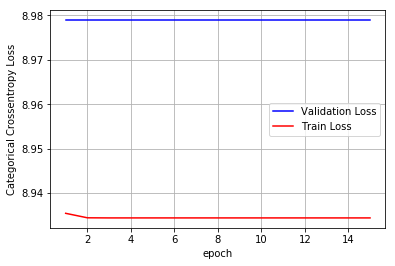

In [34]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,15+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

### Resnets

In [10]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [12]:
num_classes=4
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
#image_input = Input(shape=(224, 224, 3))
from keras.applications import ResNet50
model = ResNet50(weights='imagenet',include_top=False)
#model.summary()
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dense(256, activation='relu',name='fc-2')(x)
# a sigmoid layer for 2 classes
out = Dense(4, activation='softmax',name='output_layer')(x)

# this is the model we will train


C:\Users\santosh\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [22]:
import time
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-6].trainable

custom_resnet_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(x_train, y_train, batch_size=32, epochs=5, verbose=0, validation_data=(x_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(x_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
bn3d_branch2c (BatchNormalizati (None, None, None, 5 2048        res3d_branch2c[0][0]             
__________________________________________________________________________________________________
add_23 (Add)                    (None, None, None, 5 0           bn3d_branch2c[0][0]              
                                                                 activation_68[0][0]              
__________________________________________________________________________________________________
activation_71 (Activation)      (None, None, None, 5 0           add_23[0][0]                     
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, None, None, 2 131328      activation_71[0][0]              
__________________________________________________________________________________________________
bn4a_branc

__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, None, None, 5 2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_93 (Activation)      (None, None, None, 5 0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, None, None, 5 2359808     activation_93[0][0]              
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, None, None, 5 2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 5 0           bn5b_branch2b[0][0]              
__________

In [23]:
score=custom_resnet_model2.evaluate(x_test,y_test)

194/194 [==============================] - ETA: 55 - ETA: 45 - ETA: 35 - ETA: 24 - ETA: 12 - ETA: 0 - 74s 383ms/step


In [24]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.7250276066593289
Test accuracy: 0.6134020618556701


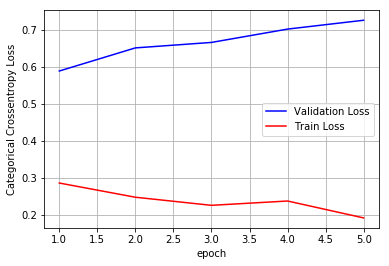

In [25]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,5+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

## performance

In [6]:
import pickle
final_model=pickle.load(open("best_model0.pickle","rb"))

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score

In [20]:
pred=final_model.predict(X_test)

In [26]:
pred=np.argmax(pred, axis=1)

In [27]:
c=confusion_matrix(Y_test,pred)

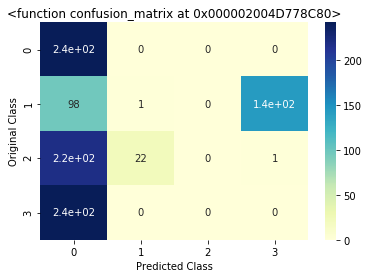

In [28]:
plt.title(confusion_matrix)
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [29]:
print(c)

[[242   0   0   0]
 [ 98   1   0 143]
 [219  22   0   1]
 [242   0   0   0]]


In [37]:
print(precision_score(Y_test,pred,average='micro'))

0.2510330578512397


In [38]:
print(recall_score(Y_test,pred,average='micro'))

0.2510330578512397


In [40]:
print(accuracy_score(Y_test,pred))

0.2510330578512397
